<a href="https://colab.research.google.com/github/charann90/Netflix-Movies-and-TV-Shows-Clustering/blob/main/netflix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem Statement

This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

**In this project, you are required to do**




*   Exploratory Data Analysis

*   Understanding what type content is available in different countries

*   Has Netflix increasingly focused on TV as compared to movies in recent years?
*   Clustering similar content by matching text-based features





**Data Description**

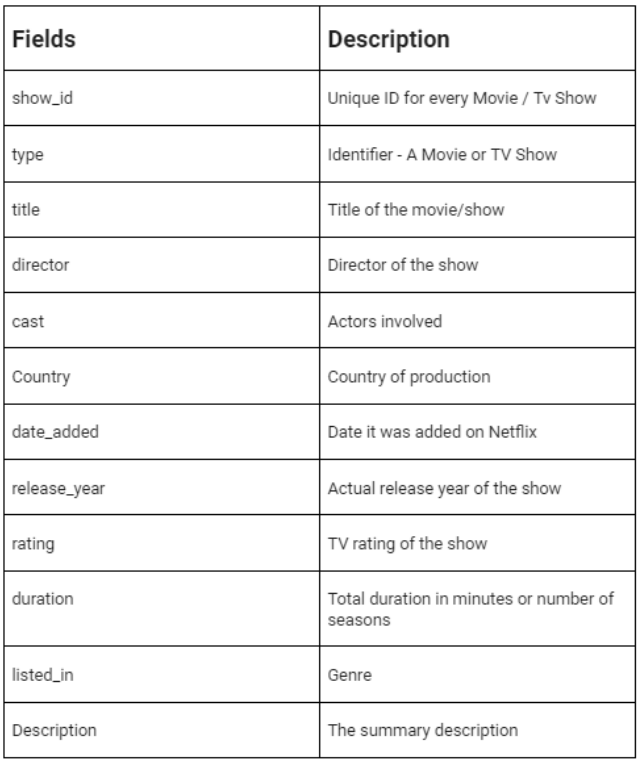

# Libraries

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('punkt')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

# Data uploading

In [2]:
#uploading and reading the data
df=pd.read_csv('/content/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


# Data Wrangling

In [3]:
#getting the summary of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [4]:
#understanding the statistical information
df.describe()

,release_year
count,7787.000000
mean,2013.932580
std,8.757395
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2018.000000
max,2021.000000


# Data Cleaning

In [5]:
#checking the null values
df.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In the given data 5 features are having null values which need to be corrected

In [6]:
#dropping and replacing null valuse for different columns

#dropping null values of date_added and rating column as it has only single digit null values
df.dropna(subset=['date_added','rating'],inplace=True)
#replacing null values in director column by unknown
df['director'].fillna('unknown',inplace=True)
#replacing null values in country column by mode value of it
df['country'].fillna(df['country'].mode()[0],inplace=True)
#replacing null values in cast column by no cast
df['cast'].fillna('no cast',inplace=True)


In [7]:
#dropping unnessasary columns
df.drop(['show_id'],axis=1,inplace=True)

In [8]:
#checking null values after cleaning
df.isnull().sum()

type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

# EDA

Type of content available in different countries:

In [9]:
#count of type of content present in diffrent countries
df['type'].value_counts()

Movie      5372
TV Show    2398
Name: type, dtype: int64

We can see that movie content is double the number of TV shows

In [10]:
import seaborn as sns

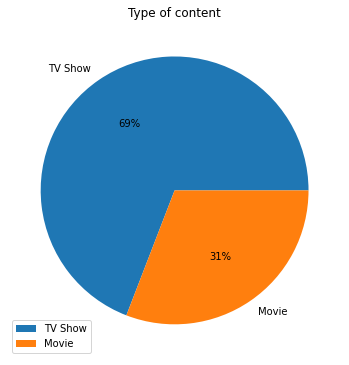

In [11]:
#plotting the type of content in the form of pie plot
plt.figure(figsize=(6,7))
plt.pie(df['type'].value_counts(),labels=df['type'].unique(),autopct='%1.0f%%')
plt.title('Type of content')
plt.legend()
plt.show()

In [12]:
#replacing and converting datatype of duration column to integer

df['duration']=df['duration'].str.replace('Season','')
df['duration']=df['duration'].str.replace('s','')

In [13]:
#Replacing and converting datatype of duration column to integer
df['duration']=df['duration'].str.replace('min','')

df['duration']=df['duration'].astype(str).astype(int)

In [14]:
#creating a variable column for each type seperately
tv_shows=df[df['type']=='TV Show']
movie=df[df['type']=='Movie']

In [15]:
#count of movie and tv shows for different countries
df['country'].value_counts()

United States                                                   3051
India                                                            923
United Kingdom                                                   396
Japan                                                            224
South Korea                                                      183
                                                                ... 
Russia, United States, China                                       1
Italy, Switzerland, France, Germany                                1
United States, United Kingdom, Canada                              1
United States, United Kingdom, Japan                               1
Sweden, Czech Republic, United Kingdom, Denmark, Netherlands       1
Name: country, Length: 681, dtype: int64

In [16]:
#percentage of ovreall share of movie/tvshow content for the top 10 countries 
df['country'].value_counts().nlargest(10).sum()/len(df)*100

69.54954954954955


*   Content of top 10 countries accounts for 69.54% for overall contents present




In [17]:
#crreating a movie variable for seperated type of content grouping with countries
country_movie=pd.DataFrame(movie.groupby(['country'])['type'].size().sort_values(ascending=False))

In [18]:
#renaming the column
country_movie.rename(columns={'type':'count'})

,count
country,
United States,2076
India,852
United Kingdom,193
Canada,118
Spain,89
...,...
"India, Switzerland",1
"India, Pakistan",1
"India, Nepal",1


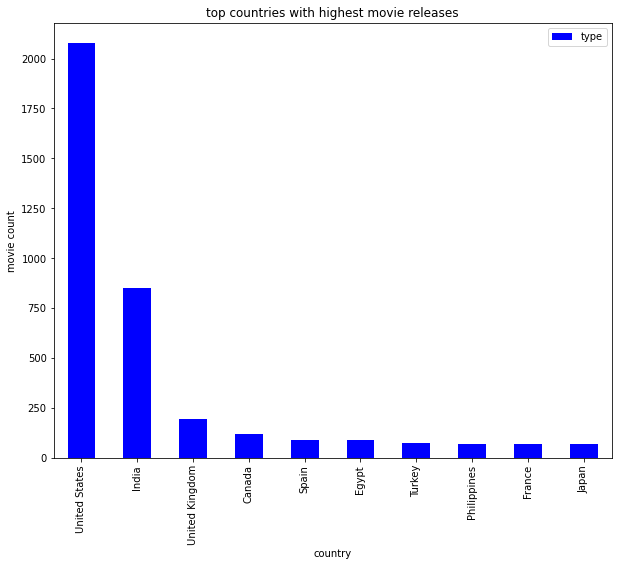

In [19]:
#plotting movie counts of top countries
country_movie.head(10).plot(kind='bar',figsize=(10,8),title='top countries with highest movie releases',color='b',ylabel='movie count')



**United Nations has highest movie content released and then followed by India** 




In [20]:
#creating a tvshow  variable for seperated tv shows type of content grouping with countries

country_tvshow=pd.DataFrame(tv_shows.groupby(['country'])['type'].size().sort_values(ascending=False))

In [21]:
#renaming the column
country_tvshow.rename(columns={'type':'count'})

,count
country,
United States,975
United Kingdom,203
Japan,155
South Korea,147
India,71
...,...
"Mexico, Spain",1
"China, Hong Kong",1
"Mauritius, South Africa",1


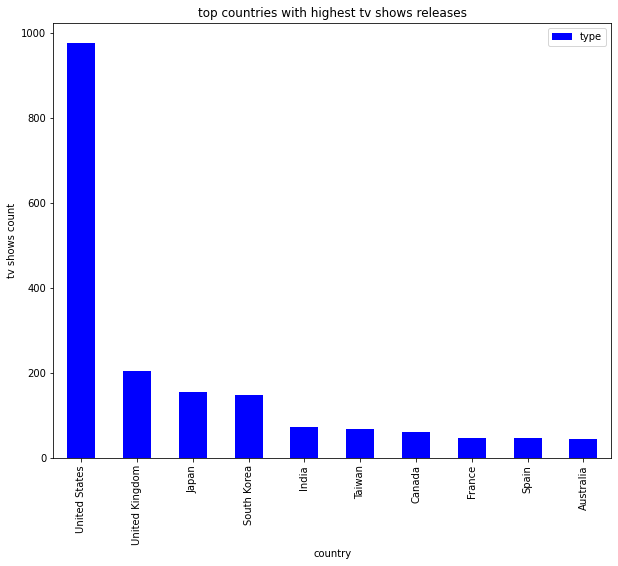

In [22]:
#plotting tv show counts of top countries
country_tvshow.head(10).plot(kind='bar',figsize=(10,8),title='top countries with highest tv shows releases',color='b',ylabel='tv shows count')

 **United Nations has highest tv show content released and then followed by United Kingdom**





---





In [23]:
num_col=['show_id','type','title','director','cast','country','date_added','release_year','rating','duration','listed_in','description']

In [24]:
#comparing type of content in different years
release_df=df.groupby(['release_year','type'])['release_year'].count().unstack()

In [25]:
release_df.tail(10)

type,Movie,TV Show
release_year,,
2012,158.0,60.0
2013,202.0,63.0
2014,244.0,90.0
2015,380.0,156.0
2016,642.0,239.0
2017,742.0,268.0
2018,734.0,386.0
2019,582.0,414.0
2020,411.0,457.0


Text(0.5, 0, 'Release year ')

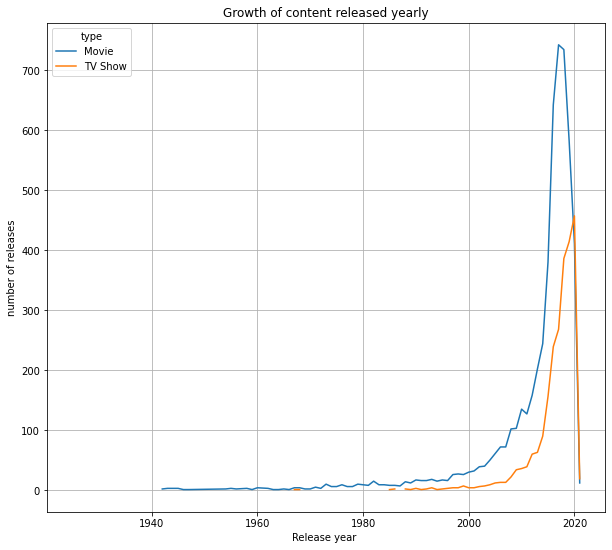

In [26]:
#plotting sum of contentent released in different years
release_df.plot(figsize=(10,9),grid=True)
plt.title('Growth of content released yearly')
plt.ylabel('number of releases')
plt.xlabel('Release year ')



*   Netflix started releasing movies after 1940 and after 1980 Tv show content was started streaming.
*   we can see that there is a graduall increase in releases after 2000 where movie content releases are more then Tv show content




In [27]:
#creating seperate columns for month and year from release date column
df['month']=pd.DatetimeIndex(df['date_added']).month
df['year']=pd.DatetimeIndex(df['date_added']).year
df.drop(['release_year'],axis=1,inplace=True)

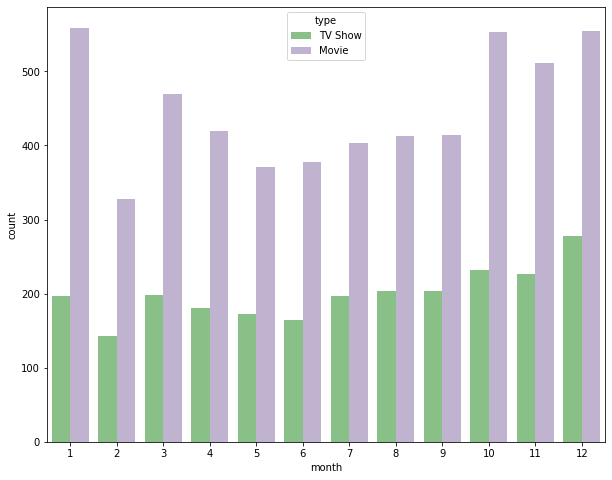

In [28]:
#plotting monthly content released for both movies and Tv shows
plt.figure(figsize=(10,8))
sns.countplot(x='month',hue='type',data=df,palette="Accent")



*   It is concluded that in the month of january, october and december maximum 
movies/tvshows has been released.




**Top Movie/TV Show content type with respect to duration**

Text(0.5, 1.0, 'length distribution of movies')

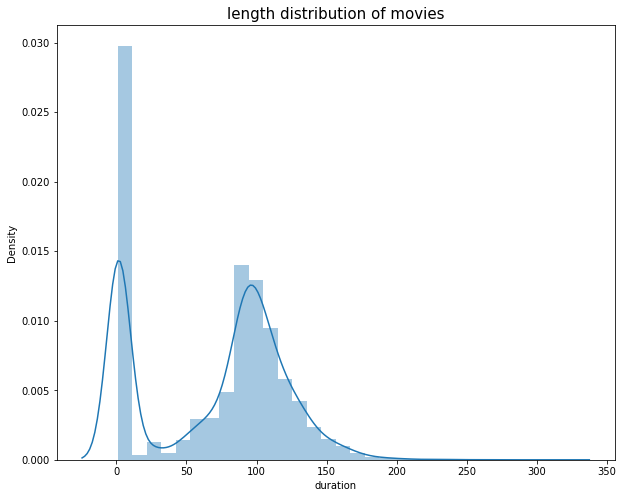

In [29]:
#plotting distribution plot for duration to see the frequency distribution 
plt.figure(figsize=(10,8))
sns.distplot(df['duration'],bins=30)
plt.title('length distribution of movies',fontsize=15)

The mean duration of movies are 100 minutes

In [30]:
#creating a table for movies with highest duration
long_movies=movie[['title','duration']]
long_movies.sort_values(by=['duration'],ascending=False)

,title,duration
957,Black Mirror: Bandersnatch,312
6850,The School of Mischief,253
4490,No Longer kids,237
3694,Lock Your Girls In,233
5108,Raya and Sakina,230
...,...,...
463,American Factory: A Conversation with the Obamas,10
1203,Canvas,9
1501,Cops and Robbers,8
5694,Sol Levante,5




*   Black Mirror: Bandersnatch	is the longest movie which is 312 minutes long and the second is The School of Mischief	.




In [31]:
#creating a table for Tv shows with highest duration
long_tv_shows=tv_shows[['title','duration']]
long_tv_shows.sort_values(by=['duration'],ascending=False)

,title,duration
2538,Grey's Anatomy,16
5912,Supernatural,15
4438,NCIS,15
1471,COMEDIANS of the world,13
1537,Criminal Minds,12
...,...,...
3563,Learning Songs by Little Baby Bum: Nursery Rhy...,1
3550,Laws of Attraction,1
3548,Lavender,1
610,Atelier,1




*  Grey's Anatomy		is longest Tv show which has 16 seasons and followed by Supernatural which has 15 seasons




**Most occured Categories for movies and Tv shows**

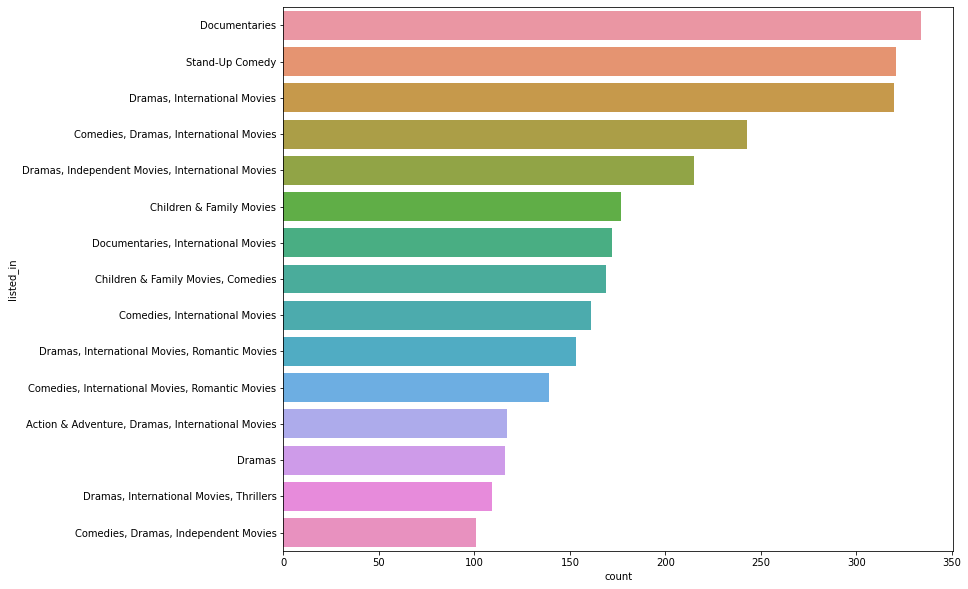

In [32]:
#top categories of movies
plt.figure(figsize=(12,10))
sns.countplot(y=movie['listed_in'],data=df,order=movie['listed_in'].value_counts().index[:15])



*   Movies which are documentaries and stand up comedy has highest content in netflix



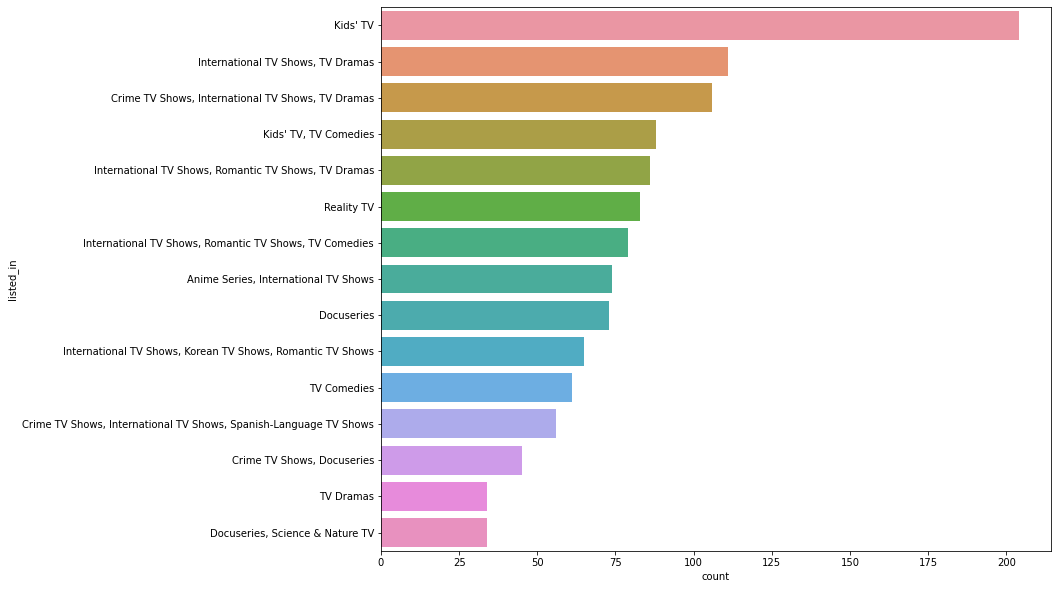

In [33]:
#top categories of Tv shows
plt.figure(figsize=(12,10))
sns.countplot(y=tv_shows['listed_in'],data=df,order=tv_shows['listed_in'].value_counts().index[:15])



*   Tv shows for kids category has highest content in netflix




**Most popular ratings for Tvshows/Movies**



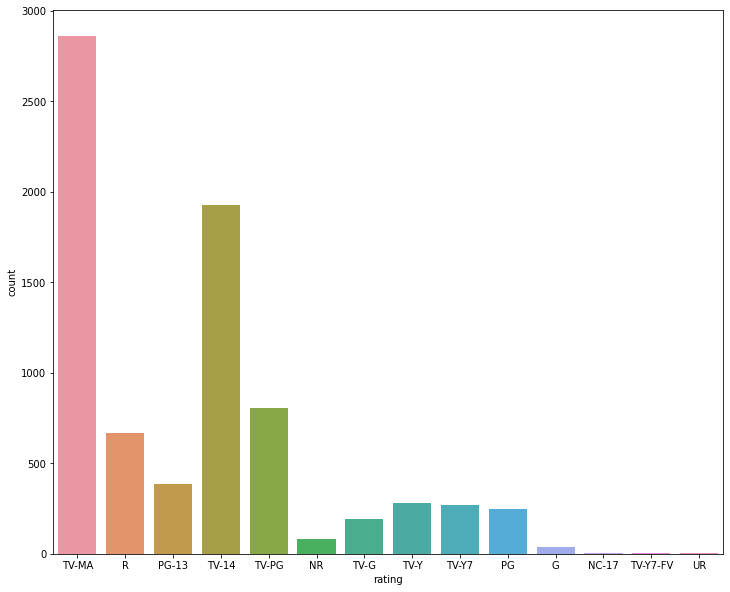

In [34]:
#plotting top movie content rating 
plt.figure(figsize=(12,10))
sns.countplot(df['rating'])



*   Most of the contents got rating TV_MA(Mature Audience) and the second most rated contents is for Tv-14(excludes children)



In [35]:
df.head(5)

,type,title,director,cast,country,date_added,rating,duration,listed_in,description,month,year
0,TV Show,3%,unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",TV-MA,4,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,8,2020
1,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",TV-MA,93,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,12,2016
2,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",R,78,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",12,2018
3,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",PG-13,80,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",11,2017
4,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",PG-13,123,Dramas,A brilliant group of students become card-coun...,1,2020


In [36]:
df.shape

(7770, 12)

In [37]:
df.head()

,type,title,director,cast,country,date_added,rating,duration,listed_in,description,month,year
0,TV Show,3%,unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",TV-MA,4,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,8,2020
1,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",TV-MA,93,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,12,2016
2,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",R,78,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",12,2018
3,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",PG-13,80,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",11,2017
4,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",PG-13,123,Dramas,A brilliant group of students become card-coun...,1,2020


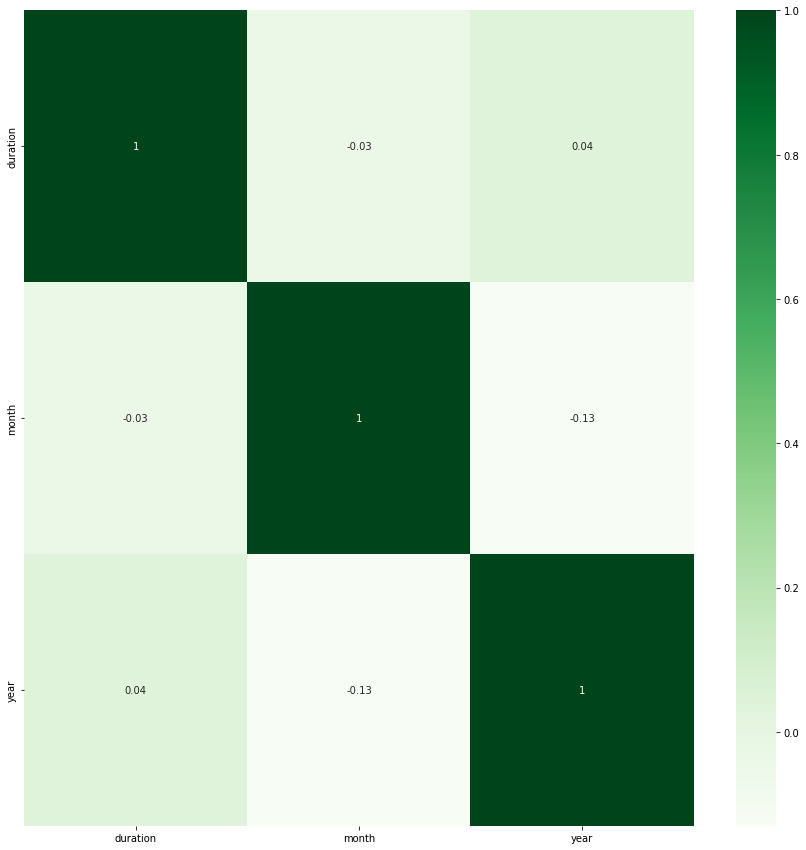

In [38]:
#plotting heat map to find out strengnth between the variables
plt.figure(figsize=(15,15))
sns.heatmap(round(df.corr(),2),cmap='Greens',annot=True)

In [39]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [40]:
#merging all the text columns
df['clustered_data']=(df['listed_in']+' '+df['cast'])
#clustered_df.set_index('title',inplace=True)
df.head()

,type,title,director,cast,country,date_added,rating,duration,listed_in,description,month,year,clustered_data
0,TV Show,3%,unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",TV-MA,4,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,8,2020,"International TV Shows, TV Dramas, TV Sci-Fi &..."
1,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",TV-MA,93,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,12,2016,"Dramas, International Movies Demián Bichir, Hé..."
2,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",R,78,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",12,2018,"Horror Movies, International Movies Tedd Chan,..."
3,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",PG-13,80,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",11,2017,"Action & Adventure, Independent Movies, Sci-Fi..."
4,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",PG-13,123,Dramas,A brilliant group of students become card-coun...,1,2020,"Dramas Jim Sturgess, Kevin Spacey, Kate Boswor..."


In [41]:
df['clustered_data'][8]

'Horror Movies, International Movies Divya Dutta, Atul Kulkarni, Mohan Agashe, Anupam Shyam, Raayo S. Bakhirta, Yashvit Sancheti, Greeva Kansara, Archan Trivedi, Rajiv Pathak'

In [42]:
import string

In [43]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.snowball import SnowballStemmer


In [44]:
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

# Feature Engineering

In [45]:
#removing punctuations from the clustered data
def remove_punctuations(text):
  translator=str.maketrans('','',string.punctuation)
  return text.translate(translator)
df['clustered_data']=df['clustered_data'].apply(remove_punctuations)  

In [46]:
df['clustered_data']

0       International TV Shows TV Dramas TV SciFi  Fan...
1       Dramas International Movies Demián Bichir Héct...
2       Horror Movies International Movies Tedd Chan S...
3       Action  Adventure Independent Movies SciFi  Fa...
4       Dramas Jim Sturgess Kevin Spacey Kate Bosworth...
                              ...                        
7782    Dramas International Movies Imad Creidi Antoin...
7783    Dramas International Movies Music  Musicals Vi...
7784    Documentaries International Movies Music  Musi...
7785    International TV Shows Reality TV Adriano Zumb...
7786                Documentaries Music  Musicals no cast
Name: clustered_data, Length: 7770, dtype: object

In [47]:
#removing all thne stopwords from the clustered data
sw = nltk.corpus.stopwords.words('english')
def stopword(txt):
  description=[word.lower() for word in txt.split() if word.lower() not in sw]
  return ' '.join(description)

df['clustered_data']=df['clustered_data'].apply(stopword)

In [48]:
df['clustered_data']

0       international tv shows tv dramas tv scifi fant...
1       dramas international movies demián bichir héct...
2       horror movies international movies tedd chan s...
3       action adventure independent movies scifi fant...
4       dramas jim sturgess kevin spacey kate bosworth...
                              ...                        
7782    dramas international movies imad creidi antoin...
7783    dramas international movies music musicals vic...
7784    documentaries international movies music music...
7785    international tv shows reality tv adriano zumb...
7786                    documentaries music musicals cast
Name: clustered_data, Length: 7770, dtype: object

In [49]:
'''def tokenizer(text):
  word_tokens=word_tokenize(text)
  return word_tokens

df['clustered_data']=df['clustered_data'].apply(tokenizer)'''

"def tokenizer(text):\n  word_tokens=word_tokenize(text)\n  return word_tokens\n\ndf['clustered_data']=df['clustered_data'].apply(tokenizer)"

In [50]:
df['clustered_data']

0       international tv shows tv dramas tv scifi fant...
1       dramas international movies demián bichir héct...
2       horror movies international movies tedd chan s...
3       action adventure independent movies scifi fant...
4       dramas jim sturgess kevin spacey kate bosworth...
                              ...                        
7782    dramas international movies imad creidi antoin...
7783    dramas international movies music musicals vic...
7784    documentaries international movies music music...
7785    international tv shows reality tv adriano zumb...
7786                    documentaries music musicals cast
Name: clustered_data, Length: 7770, dtype: object

Text(0.5, 1.0, 'word cloud')

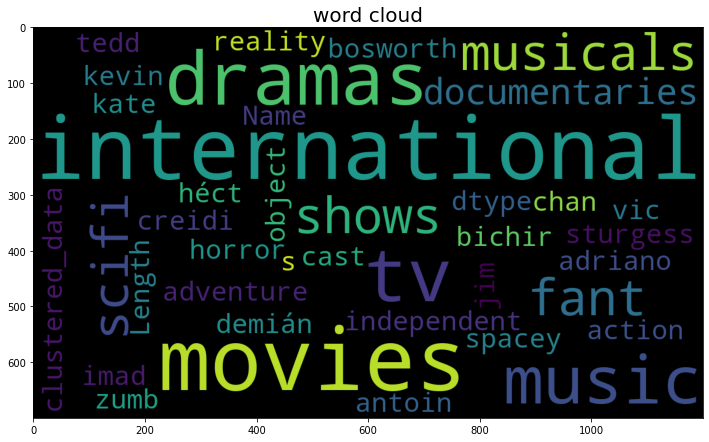

In [51]:
from wordcloud import WordCloud

wordcloud=WordCloud(background_color = 'black',width = 1200,height = 700).generate(str(df['clustered_data']))

plt.figure(figsize=(12,15))
plt.imshow(wordcloud)
plt.title('word cloud',fontsize=20)


In [52]:
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer


In [53]:
stemmer = SnowballStemmer('english')

In [54]:
def stemming(text):
  stemmer = SnowballStemmer('english')
  description=[stemmer.stem(word) for word in text.split()]

  return ' '.join(description)

In [55]:
df['clustered_data']=df['clustered_data'].apply(stemming)

In [56]:
def tokenizer(text):
  word_tokens=word_tokenize(text)
  return word_tokens

df['clustered_data']=df['clustered_data'].apply(tokenizer)

In [57]:
def lemma(txt):
    lemma=WordNetLemmatizer()
    description=[lemma.lemmatize(word) for word in txt]
    x=" ".join(description)
    return x

In [58]:
import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [59]:
df['clustered_data']=df['clustered_data'].apply(lemma)

In [60]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [61]:
df['clustered_data'].head()

0    intern tv show tv drama tv scifi fantasi joão ...
1    drama intern movi demián bichir héctor bonilla...
2    horror movi intern movi tedd chan stella chung...
3    action adventur independ movi scifi fantasi el...
4    drama jim sturgess kevin spacey kate bosworth ...
Name: clustered_data, dtype: object

In [62]:
from sklearn.feature_extraction.text import CountVectorizer


In [63]:
#
count_vectorizer=CountVectorizer()
cv=count_vectorizer.fit(df['clustered_data'])

#sum_words=cv.sum(axis=0)

dictionary=cv.vocabulary_.items()

In [64]:
dictionary

dict_items([('intern', 11583), ('tv', 26728), ('show', 23875), ('drama', 6986), ('scifi', 23075), ('fantasi', 8082), ('joão', 12592), ('miguel', 17140), ('bianca', 3087), ('comparato', 5442), ('michel', 17099), ('gome', 9467), ('rodolfo', 21815), ('valent', 27020), ('vaneza', 27074), ('oliveira', 19197), ('rafael', 20971), ('lozano', 15368), ('vivian', 27462), ('porto', 20535), ('mel', 16874), ('fronckowiak', 8649), ('sergio', 23314), ('mamberti', 15935), ('zezé', 28917), ('motta', 17730), ('celso', 4608), ('frateschi', 8588), ('movi', 17761), ('demián', 6348), ('bichir', 3098), ('héctor', 11322), ('bonilla', 3469), ('oscar', 19370), ('serrano', 23331), ('azalia', 2090), ('ortiz', 19358), ('octavio', 19007), ('carmen', 4398), ('beato', 2648), ('horror', 11057), ('tedd', 25812), ('chan', 4727), ('stella', 24766), ('chung', 5196), ('henley', 10650), ('hii', 10792), ('lawrenc', 14723), ('koh', 13868), ('tommi', 26348), ('kuan', 14176), ('josh', 12559), ('lai', 14475), ('mark', 16236), ('l

In [65]:
word=[]
count=[]
for value, key in dictionary:
  word.append(value)
  count.append(key)

In [66]:
freq_df=pd.DataFrame({'word':word,'count':count}).sort_values(by='count',ascending=False)
freq_df

,word,count
15989,ṣọpẹ,29230
28149,żurawski,29229
26652,żulewska,29228
24030,źak,29227
12881,şükrü,29226
...,...,...
27453,aabha,4
11892,50,3
1125,4minut,2
12024,390,1


In [67]:
top_words=freq_df.head(20)

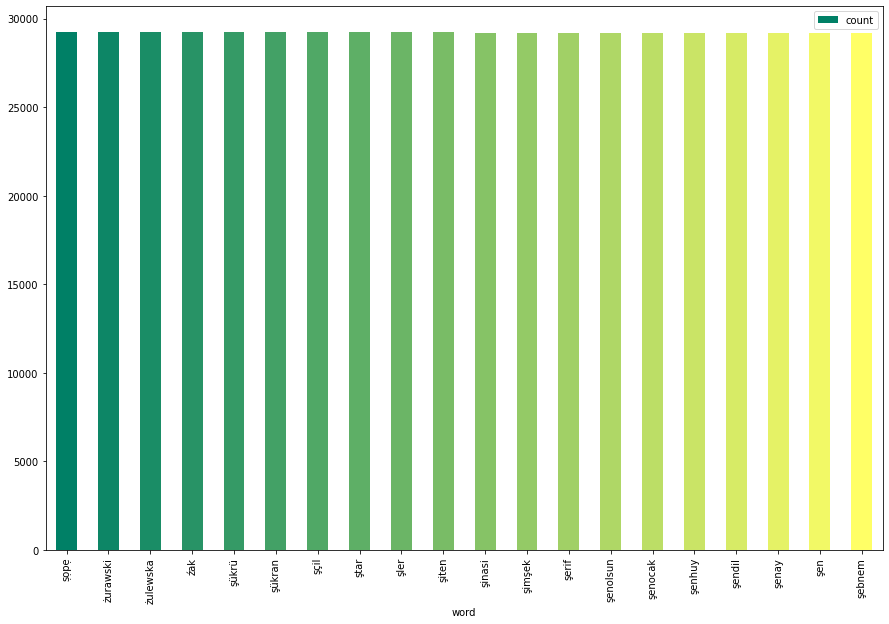

In [68]:
top_words.plot(kind='bar',x='word',y='count',figsize=(15,10),color = plt.cm.summer(np.linspace(0, 1, 20)))

In [69]:
from sklearn.preprocessing import StandardScaler


In [70]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
import nltk

In [71]:

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [72]:
from nltk.tokenize import TweetTokenizer


In [73]:
'''def tokenizer(text):
  word_tokens=word_tokenize(text)
  return word_tokens

df['clustered_data']=df['clustered_data'].apply(tokenizer)'''

"def tokenizer(text):\n  word_tokens=word_tokenize(text)\n  return word_tokens\n\ndf['clustered_data']=df['clustered_data'].apply(tokenizer)"

In [74]:
#df['clustered_data']=df['clustered_data'].apply(nltk.word_tokenize)

In [75]:
#scalar=StandardScaler()
#rescaled_c=scalar.fit_transform(cluster)


In [76]:
'''def identity_tokenizer(text):
    return text'''

'def identity_tokenizer(text):\n    return text'

In [77]:
#creating the object for tfid vectoriser
tfid=TfidfVectorizer(stop_words='english',lowercase=False,max_features=2000)
x_tfid=tfid.fit_transform(df['clustered_data'])

In [78]:
x_tfid

<7770x2000 sparse matrix of type '<class 'numpy.float64'>'
	with 81445 stored elements in Compressed Sparse Row format>

In [79]:
x=x_tfid.toarray()

In [80]:
#calling all the feature names
tfid.get_feature_names()

['aamir',
 'aaron',
 'abbi',
 'abdel',
 'abdullah',
 'abel',
 'abhay',
 'abhishek',
 'abigail',
 'abou',
 'abraham',
 'action',
 'adam',
 'adel',
 'adesua',
 'adil',
 'aditi',
 'aditya',
 'adkin',
 'adrian',
 'adriana',
 'adrienn',
 'adrián',
 'adventur',
 'affleck',
 'ahm',
 'ahmad',
 'ahmet',
 'ahn',
 'ai',
 'aida',
 'aidan',
 'aishwarya',
 'ajay',
 'akbağ',
 'akhtar',
 'aki',
 'akira',
 'akshay',
 'al',
 'alaa',
 'alain',
 'alan',
 'alba',
 'albert',
 'alberto',
 'alec',
 'alejandro',
 'alessandro',
 'alex',
 'alexa',
 'alexand',
 'alexandra',
 'alexi',
 'alfonso',
 'alfr',
 'ali',
 'alia',
 'alic',
 'alicia',
 'alison',
 'allan',
 'allen',
 'allison',
 'alok',
 'alonso',
 'alyssa',
 'aman',
 'amanda',
 'amber',
 'amer',
 'america',
 'ami',
 'amin',
 'amir',
 'amit',
 'amitabh',
 'amr',
 'amrish',
 'amrita',
 'ana',
 'anand',
 'ander',
 'anderson',
 'andi',
 'andr',
 'andrea',
 'andrew',
 'andré',
 'angel',
 'angela',
 'angus',
 'anil',
 'anim',
 'anita',
 'anjali',
 'anmol',
 'ann'

In [81]:
#converting x to array
pd.DataFrame(x,columns=tfid.get_feature_names())

,aamir,aaron,abbi,abdel,abdullah,abel,abhay,abhishek,abigail,abou,...,zhang,zhao,zhou,zhu,zinta,zoe,zoë,álvarez,álvaro,ángel
0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.21836,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7765,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7766,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7767,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7768,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [82]:
x.shape

(7770, 2000)

# Principle component analysis for dimensionality reduction

In [83]:
#defining a pca variable
pca=PCA()
pca1=pca.fit_transform(x)

Text(0, 0.5, 'eVR')

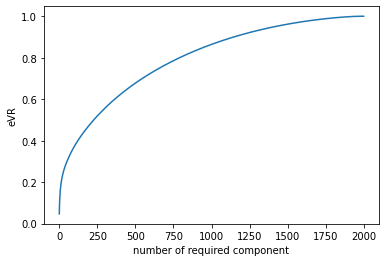

In [84]:
#plotting the percentage of varience of the matrix by 
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("number of required component")
plt.ylabel("eVR")

**In the selected 2000 components after pca dimensionality reduction we require 1500 componenets to summarize 90 percent of data** 

In [85]:
#dimensionality reduction after getting to know number of components to summarize
pca=PCA(n_components=1500)
f_pca=pca.fit_transform(x)

In [86]:
f_pca

array([[-1.01966782e-01,  2.23438248e-01, -5.42562270e-02, ...,
         1.01445453e-02,  4.85704464e-03,  1.64779840e-03],
       [-4.88369462e-02, -8.99417924e-02, -7.45181441e-02, ...,
        -1.18254489e-02,  2.29581979e-03,  1.19153083e-02],
       [-4.98819217e-02, -9.89006000e-02, -7.57054539e-02, ...,
         7.05741835e-03,  3.67658373e-02, -4.43959471e-03],
       ...,
       [ 2.59397261e-01, -2.26569961e-01, -9.91534900e-02, ...,
        -1.26866276e-03, -2.95623081e-04, -3.24022379e-04],
       [-8.99818058e-02,  4.49422343e-01, -4.76528745e-02, ...,
        -1.92960052e-04,  1.57731392e-03, -9.46064053e-03],
       [ 4.61490250e-01, -1.05981707e-01,  2.73711570e-02, ...,
        -1.70274590e-03, -9.14519165e-06, -1.02937314e-05]])

In [87]:
y=pd.DataFrame(f_pca)

In [88]:
y.describe()

,0,1,2,3,4,5,6,7,8,9,...,1490,1491,1492,1493,1494,1495,1496,1497,1498,1499
count,7.770000e+03,7.770000e+03,7.770000e+03,7.770000e+03,7.770000e+03,7.770000e+03,7.770000e+03,7.770000e+03,7.770000e+03,7.770000e+03,...,7.770000e+03,7.770000e+03,7.770000e+03,7.770000e+03,7.770000e+03,7.770000e+03,7.770000e+03,7.770000e+03,7.770000e+03,7.770000e+03
mean,5.189614e-17,6.058360e-17,7.864437e-17,2.263312e-17,-7.178585e-17,3.314952e-17,-2.477641e-17,-4.538054e-17,6.218392e-17,3.103481e-17,...,-3.114911e-18,-3.741466e-17,3.595008e-17,-2.702686e-17,2.143288e-18,-5.579692e-18,4.290862e-17,-5.243911e-17,-7.737269e-18,1.948963e-17
std,2.125950e-01,1.881181e-01,1.435475e-01,1.214259e-01,1.181920e-01,1.130679e-01,9.313163e-02,8.530585e-02,8.434872e-02,7.996719e-02,...,1.087540e-02,1.083683e-02,1.082094e-02,1.080248e-02,1.078585e-02,1.077744e-02,1.075533e-02,1.075353e-02,1.072928e-02,1.068420e-02
min,-1.724882e-01,-3.155260e-01,-3.355295e-01,-4.927189e-01,-4.196957e-01,-3.231378e-01,-3.935482e-01,-5.090565e-01,-4.730754e-01,-3.631819e-01,...,-5.125838e-02,-5.989817e-02,-5.423021e-02,-5.568756e-02,-6.044160e-02,-4.531745e-02,-5.887196e-02,-5.638921e-02,-6.013427e-02,-5.752930e-02
25%,-8.511347e-02,-1.123717e-01,-5.881121e-02,-5.553781e-02,-5.539952e-02,-6.504342e-02,-2.408953e-02,-3.121856e-02,-2.831809e-02,-4.448643e-02,...,-5.796434e-03,-5.611467e-03,-5.634313e-03,-5.582717e-03,-5.576689e-03,-5.585346e-03,-5.491619e-03,-5.614097e-03,-5.410121e-03,-5.434481e-03
50%,-6.442520e-02,-9.085240e-02,-2.486767e-02,5.900489e-05,1.139823e-03,-2.221658e-02,-6.472168e-03,9.430331e-04,6.416783e-03,-8.637686e-03,...,-3.463093e-05,1.431248e-04,2.115753e-04,-2.073545e-05,-5.197790e-05,2.026725e-05,7.610816e-05,9.414879e-05,-4.707608e-05,-2.922465e-04
75%,-4.578463e-02,7.638249e-02,8.748186e-03,4.814069e-02,5.452924e-02,3.945549e-02,1.590958e-02,3.495595e-02,2.750346e-02,2.947478e-02,...,5.524540e-03,5.594689e-03,5.599958e-03,5.627394e-03,5.251219e-03,5.587562e-03,5.517697e-03,5.371664e-03,5.329173e-03,5.680451e-03
max,9.059746e-01,7.257452e-01,9.018577e-01,7.667122e-01,6.791307e-01,7.222960e-01,5.800129e-01,5.223810e-01,5.319540e-01,4.303833e-01,...,6.670631e-02,6.607406e-02,5.952284e-02,6.338884e-02,6.293723e-02,5.434204e-02,6.811281e-02,5.825895e-02,7.636827e-02,6.047214e-02


# Clustering

# KMeans Clustering 

In [89]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering

In [90]:
scalar=StandardScaler()
rescaled=scalar.fit_transform(y)
scaled_values=rescaled

In [91]:
new=pd.DataFrame(x)

In [92]:
new.describe()

,0,1,2,3,4,5,6,7,8,9,...,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999
count,7770.000000,7770.000000,7770.000000,7770.000000,7770.000000,7770.000000,7770.000000,7770.000000,7770.000000,7770.000000,...,7770.000000,7770.000000,7770.000000,7770.000000,7770.000000,7770.000000,7770.000000,7770.000000,7770.000000,7770.000000
mean,0.001090,0.002950,0.000849,0.001295,0.001354,0.000734,0.000775,0.000906,0.000638,0.000992,...,0.002260,0.000705,0.000791,0.000583,0.000439,0.000996,0.000424,0.000560,0.000643,0.000499
std,0.020387,0.029071,0.017428,0.022903,0.024523,0.015970,0.017623,0.017292,0.014653,0.020774,...,0.028447,0.015427,0.017998,0.015665,0.012484,0.017841,0.012159,0.015193,0.014674,0.012699
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,0.736462,0.678530,0.464588,0.701322,0.647569,0.476361,0.613494,0.606966,0.422382,0.700980,...,0.607274,0.510086,0.664192,0.730478,0.522150,0.424640,0.434027,0.735368,0.532354,0.432076


**Elbow method to find the number of clusters**

Text(0, 0.5, 'sum of squared distances')

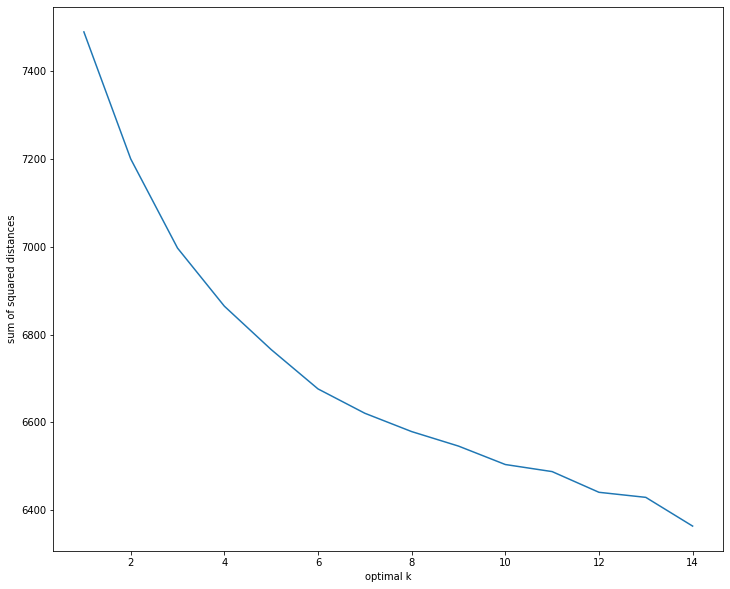

In [93]:
#Implementaing kmeans clustering
#considering range of 10 clusters

silhoutte_score=[]
value=[]
range=np.arange(1,15)
for i in range:
  kmeans=KMeans(n_clusters=i,init='k-means++',random_state=30)
  preds=kmeans.fit(new)
  pred_values=preds.inertia_
  value.append(pred_values)


plt.figure(figsize=(12,10))
plt.plot(range,value)
plt.xlabel('optimal k')
plt.ylabel('sum of squared distances')
  





In [94]:
kmean1= KMeans(n_clusters=6 ,init = 'k-means++' , random_state=30)
kmean1.fit_predict(new)

array([1, 0, 0, ..., 5, 1, 5], dtype=int32)

In [95]:
new['cluster_number']=kmean1.fit_predict(new)

In [103]:
from sklearn.metrics import silhouette_samples

In [113]:
#silhoutte method to find the optimal clusters
#range=np.arange(1,20)
silhoutte_score=[]
value=[]
range=np.arange(2,7)
for i in range:
  kmeans=KMeans(n_clusters=i,init='k-means++',random_state=33)
  preds=kmeans.fit(new)
  pred_values=preds.labels_
  silhoutte_score.append(silhouette_score(new,pred_values, metric='euclidean'))
  silhouette_values = silhouette_samples(x, pred_values)
  print('for n_clusters: ', i)
  print('silhouette_score is: ',silhoutte_score[0])

for n_clusters:  2
silhouette_score is:  0.5369687864935966
for n_clusters:  3
silhouette_score is:  0.5369687864935966
for n_clusters:  4
silhouette_score is:  0.5369687864935966
for n_clusters:  5
silhouette_score is:  0.5369687864935966
for n_clusters:  6
silhouette_score is:  0.5369687864935966


# DBSCAN

In [114]:
from sklearn.cluster import DBSCAN


In [122]:
min_samp=range(1,6,1)
for sample in min_samp:
   db=DBSCAN(eps=0.4,min_samples=min_samp)
   db_val=db.fit_predict(new)
   db_pred=db_val.labels_

TypeError: ignored